# Problem 1:

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn  
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PGD DSBA/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

# New Section

In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
print("The no of rows is : ",df.shape[0],"\n ", "The no of columns present is:  ",df.shape[1])

The no of rows is :  1525 
  The no of columns present is:   9


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [11]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [12]:
round(df.vote.value_counts(normalize=True),2)

Labour          0.7
Conservative    0.3
Name: vote, dtype: float64

In [13]:
round(df.gender.value_counts(normalize=True),2)

female    0.53
male      0.47
Name: gender, dtype: float64

In [14]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


In [15]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [16]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

## Univariate Analysis

In [17]:
def univariateAnalysis_numeric(column,i):
  fig.set_size_inches(20,40)
  a=sns.distplot(df[column],ax=axes[i][0]);
  a.set_title(column + " Distribution",fontsize=10);

  a=sns.boxplot(df[column],ax=axes[i][1]);
  a.set_title(column + " Boxplot",fontsize=10);



In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total Numerical Columns = ",columnlen)

Total Numerical Columns =  7


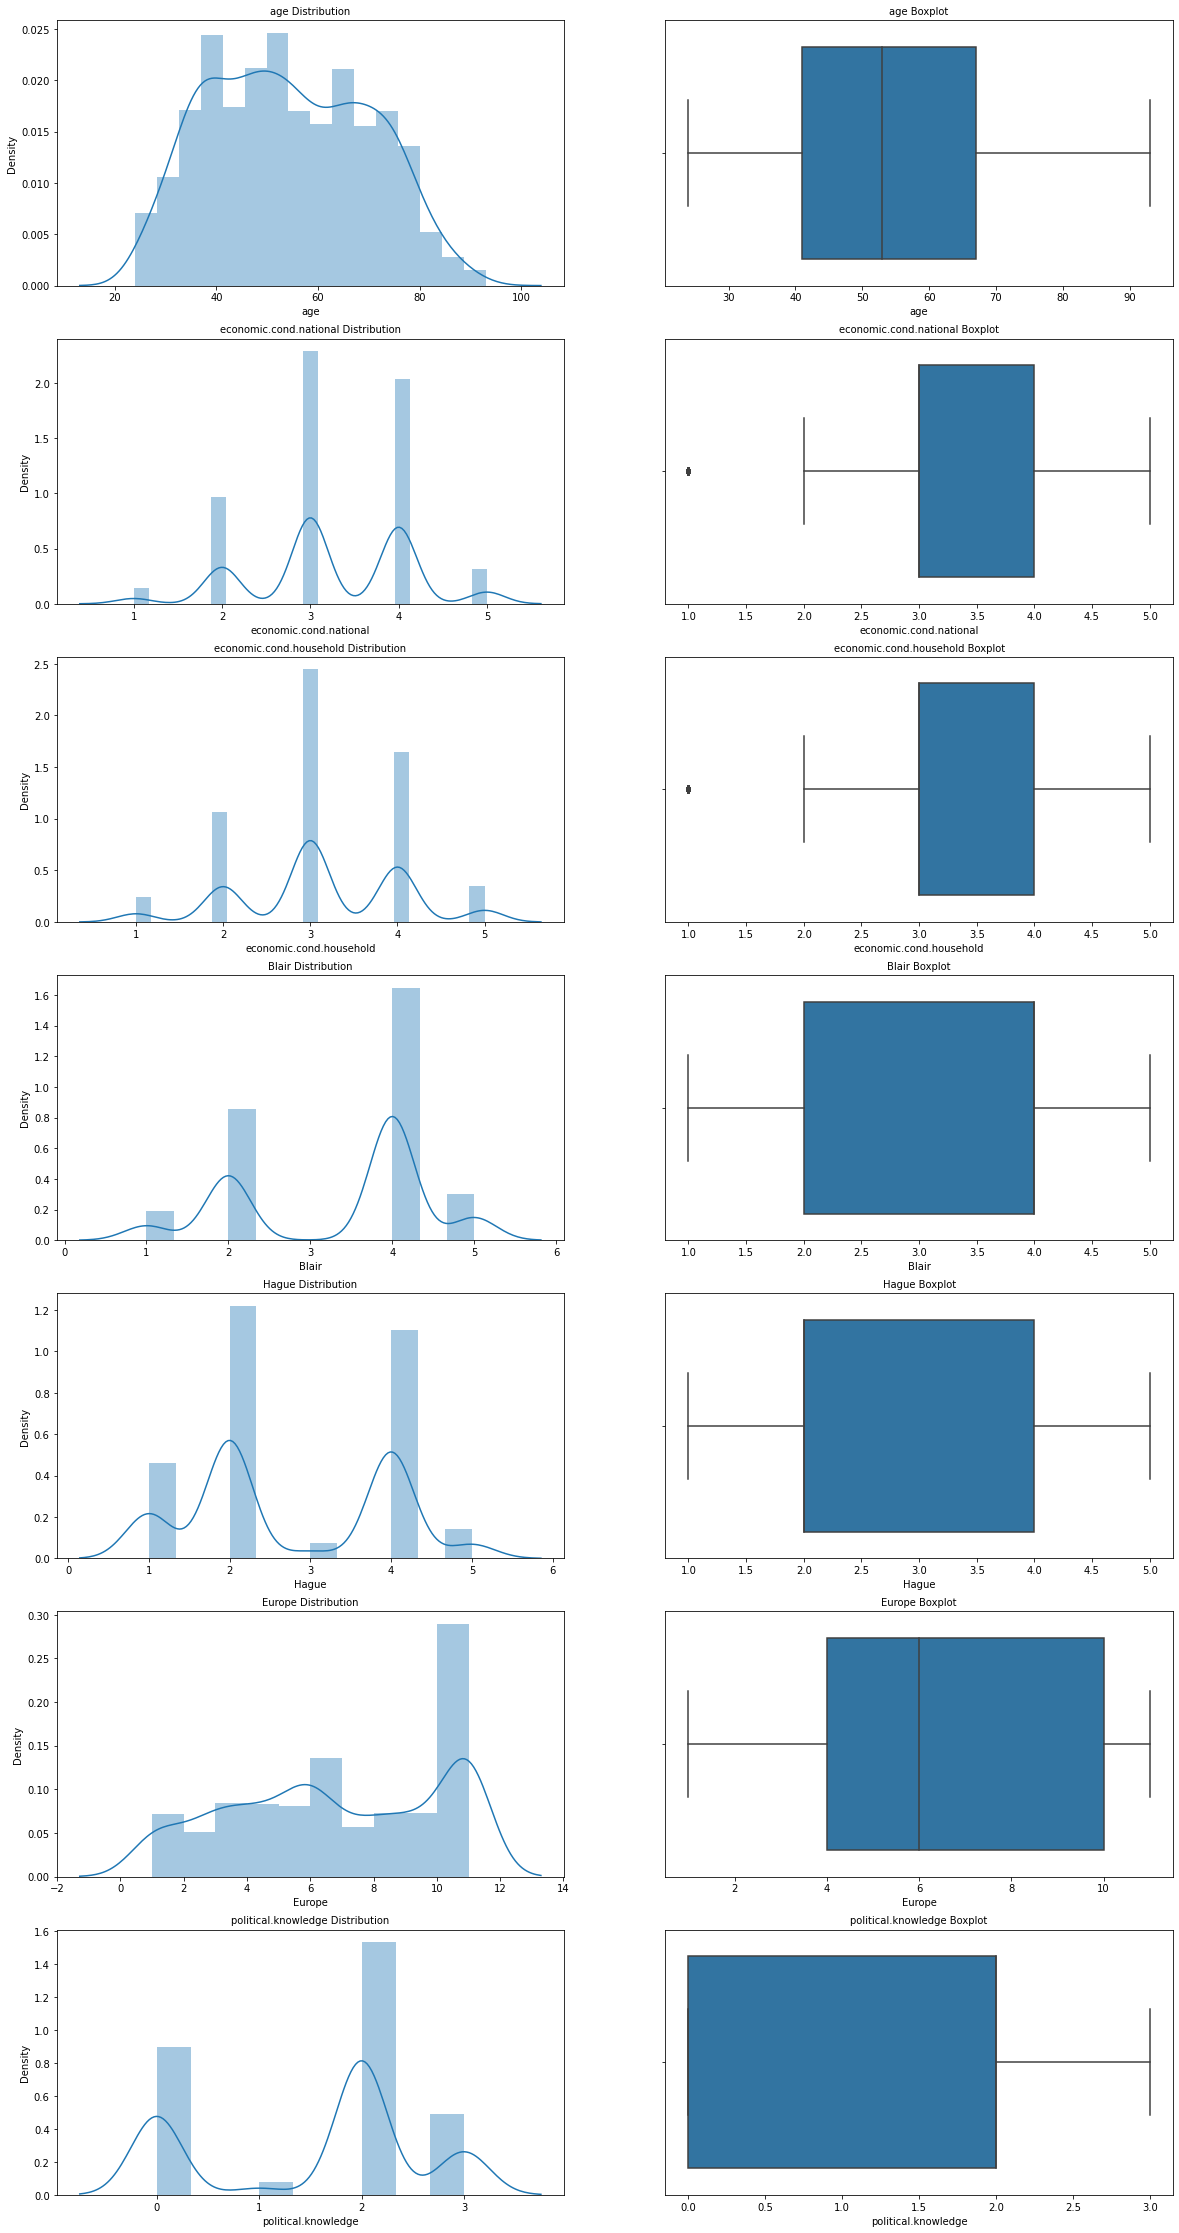

In [19]:
fig,axes=plt.subplots(nrows=columnlen,ncols=2)
for x in lstnumericcolumns:
  univariateAnalysis_numeric(x,lstnumericcolumns.index(x))

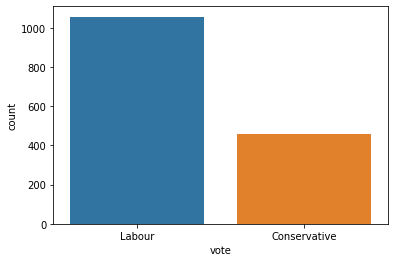

In [20]:
sns.countplot(df["vote"]);

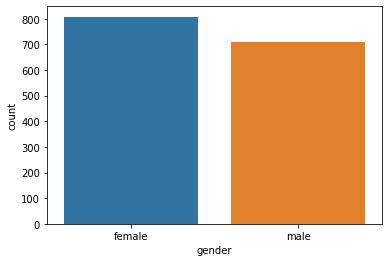

In [21]:
sns.countplot(df["gender"]);

In [22]:
pd.crosstab(df['vote'],df['gender'])

gender,female,male
vote,,
Conservative,257,203
Labour,551,506


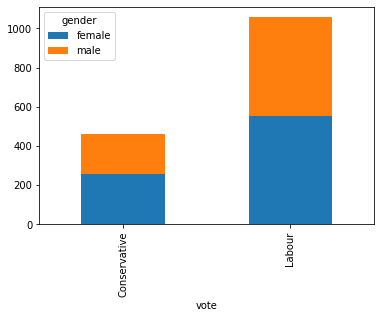

In [23]:
pd.crosstab(df['vote'], df['gender']).plot(kind = 'bar', stacked = True);

## Bivariate and Multivariate Analysis

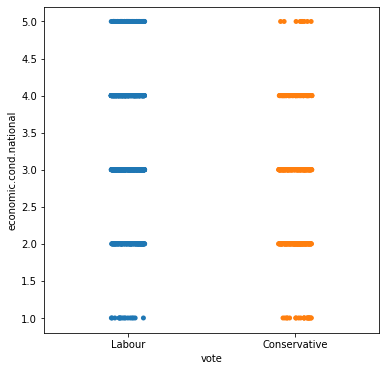

In [24]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

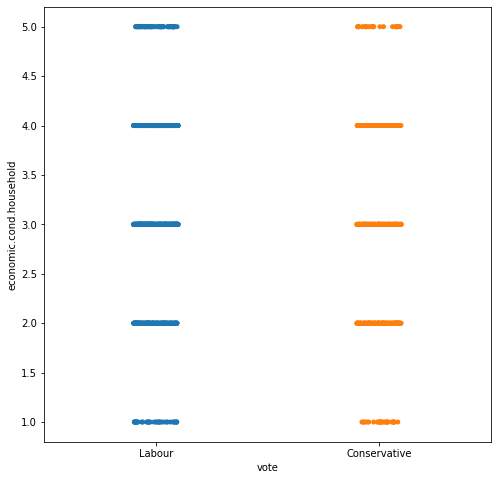

In [25]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

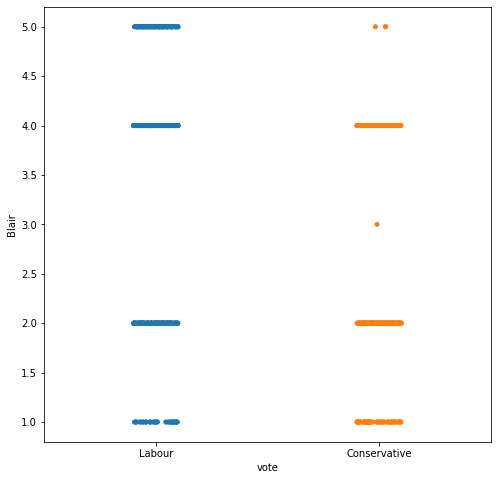

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

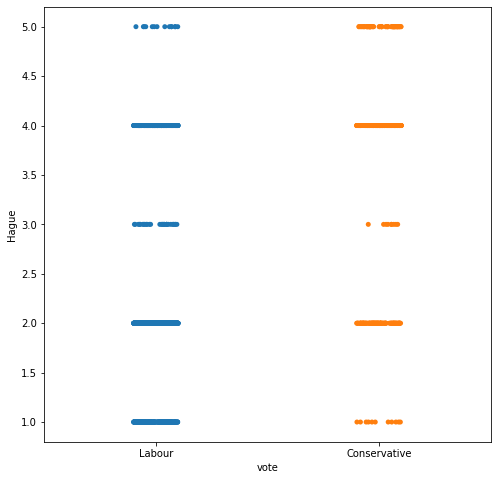

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

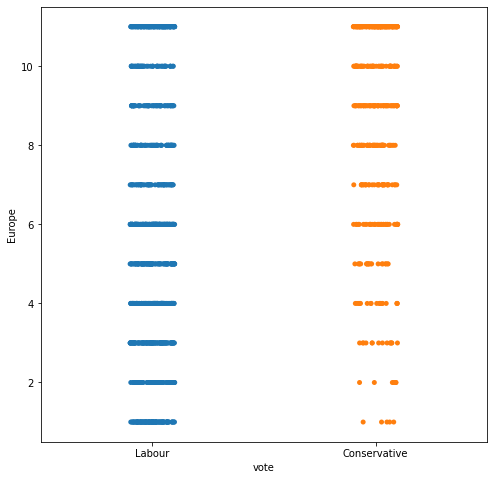

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

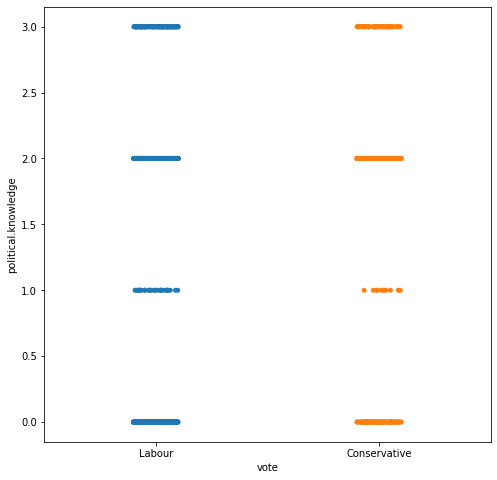

In [29]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

## Pairplot

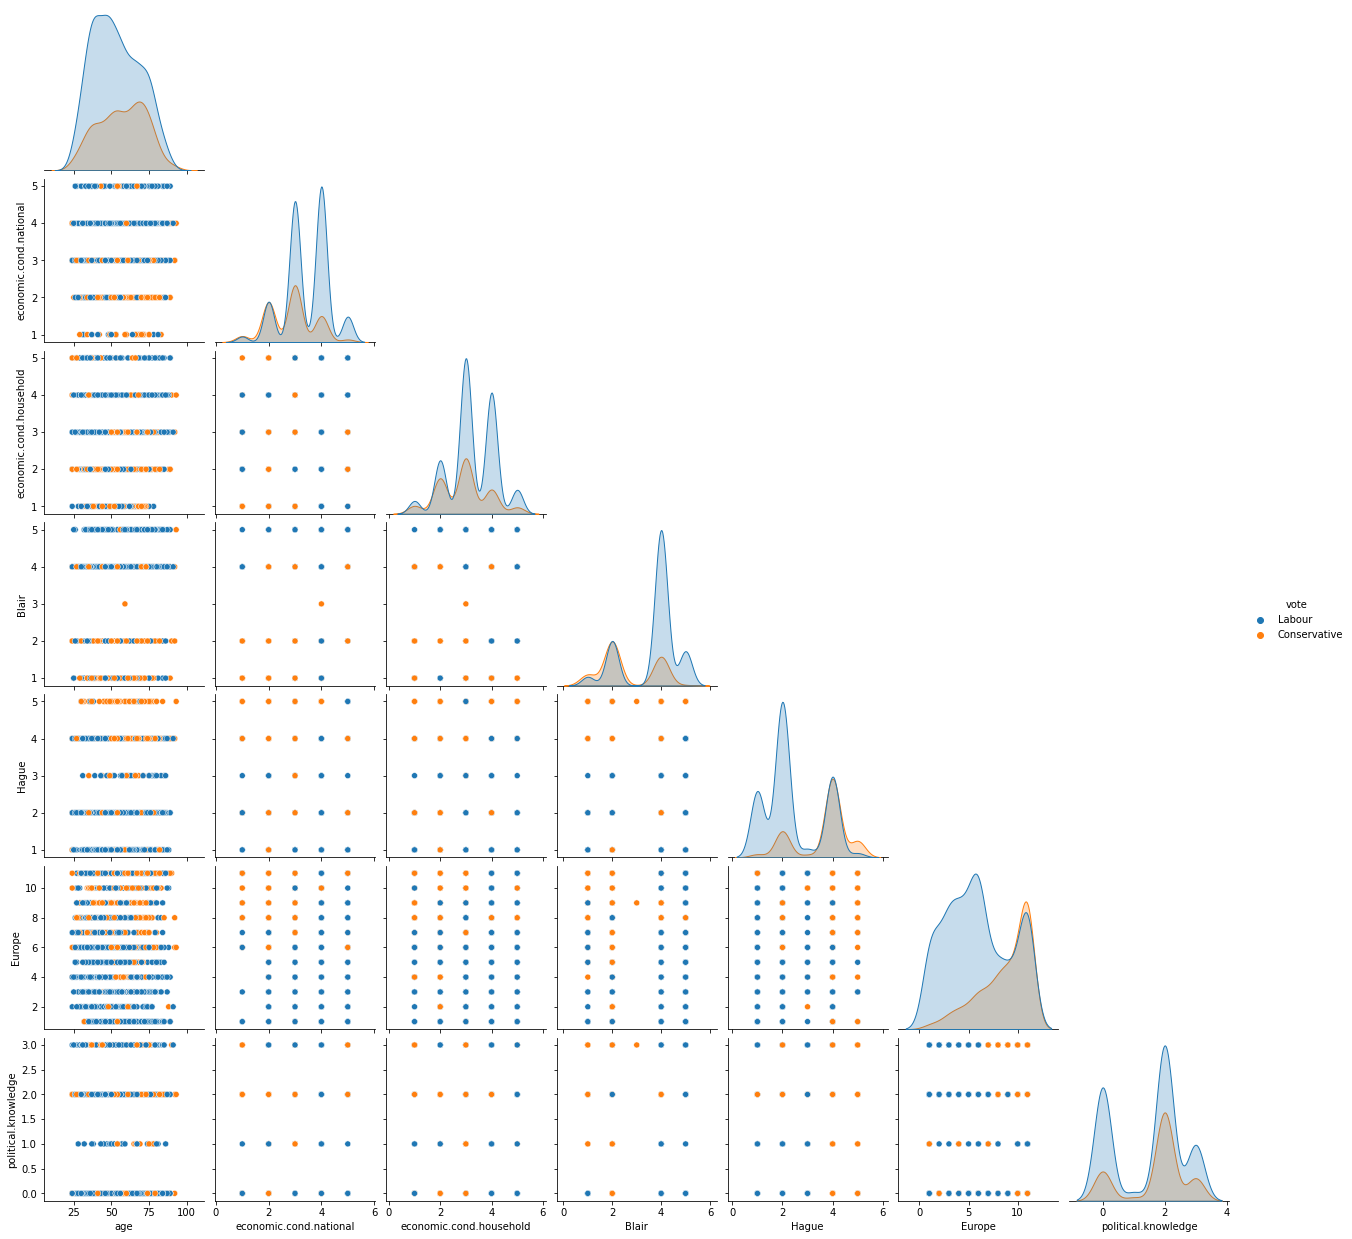

In [30]:
sns.pairplot(df, diag_kind='kde',hue="vote", corner=True)  
plt.show()

# Correlation Matrix

In [31]:
corr = df.corr(method='pearson')

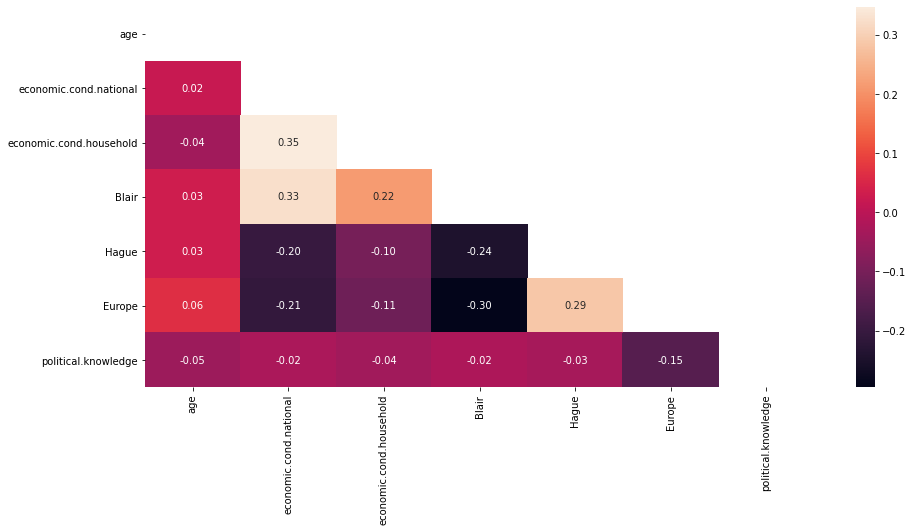

In [32]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

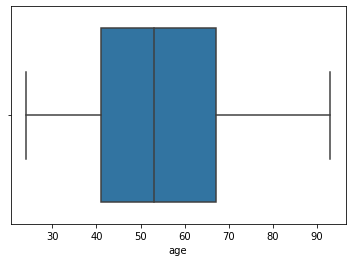

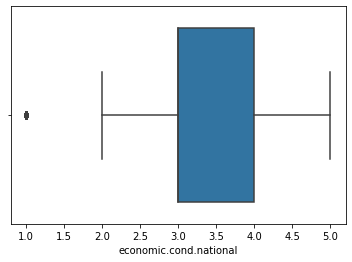

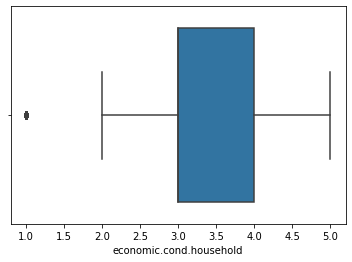

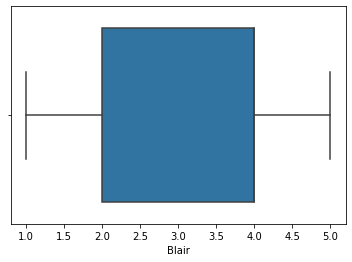

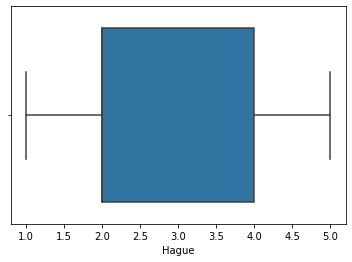

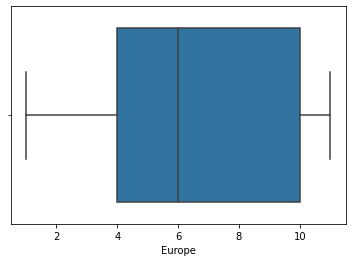

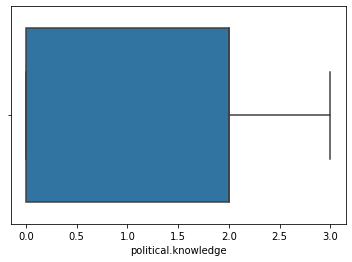

In [33]:
cols = ['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
for column in df_num.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

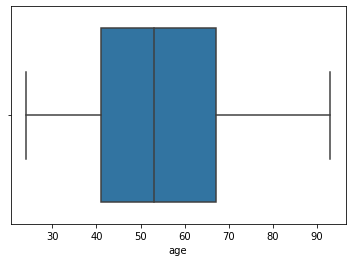

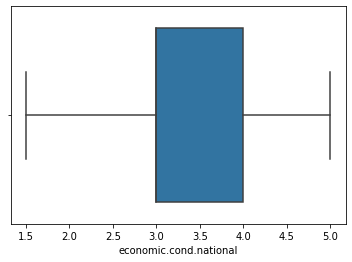

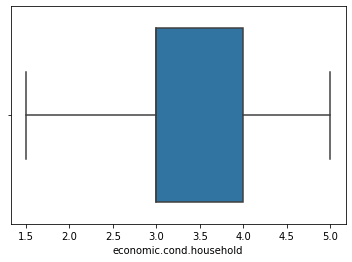

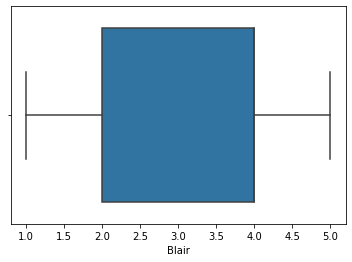

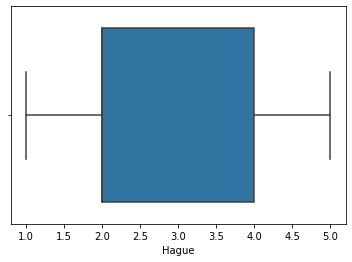

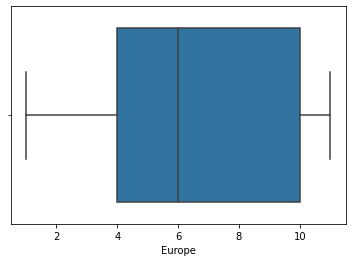

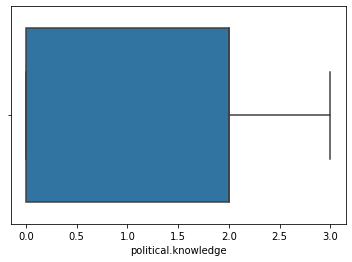

In [36]:


for i in cols:
    sns.boxplot(df[i])
    plt.show()

# 1.3 ENCODE THE DATA (HAVING STRING VALUES) FOR MODELLING. IS SCALING NECESSARY HERE OR NOT? DATA SPLIT: SPLIT THE DATA INTO TRAIN AND TEST (70:30)

In [37]:
cat1 = ['vote', 'gender']

In [38]:
dfd =pd.get_dummies(df, columns=cat1,drop_first=True)

In [39]:
dfd.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


In [40]:
dfd= dfd.rename(columns={'vote_Labour':'IsLabour' ,'gender_male':'IsMale'},inplace= False)

 # Linear Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
X=dfd.drop('IsLabour',axis=1)
Y=dfd['IsLabour']

In [43]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [44]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Train Metrics

In [45]:
y_train_predict=LDA_model.predict(X_train)
LDA_train_score=LDA_model.score(X_train,Y_train)
print("Accuracy Score : ",LDA_train_score)

Accuracy Score :  0.8341187558906692


In [46]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Confusion Matrix 



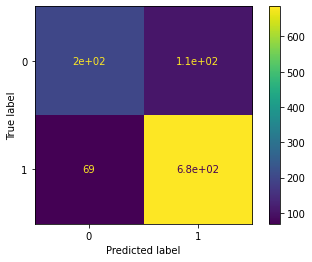

In [47]:
print("Confusion Matrix \n")
plot_confusion_matrix(LDA_model,X_train,Y_train);

# AUC ROC curve for LDA Train

The AUC score is: 0.890


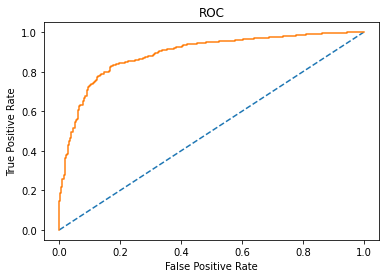

In [48]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

## Test Metrics

In [49]:
y_test_predict=LDA_model.predict(X_test)
LDA_test_score=LDA_model.score(X_test,Y_test)
print("Accuracy Score : ",LDA_test_score)

Accuracy Score :  0.831140350877193


In [50]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Confusion Matrix 



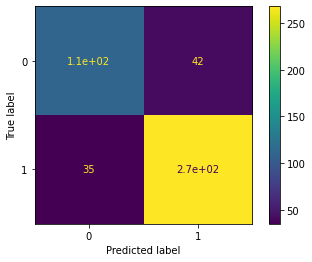

In [51]:
print("Confusion Matrix \n")
plot_confusion_matrix(LDA_model,X_test,Y_test);

# AUC ROC curve for LDA Test

The AUC score is: 0.888


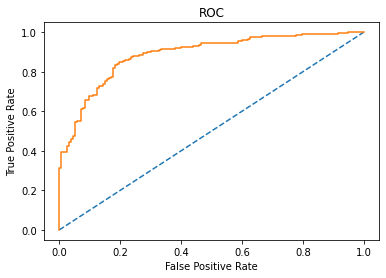

In [52]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(Y_test, probs)
print('The AUC score is: %.3f' % lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [53]:
lda_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
d=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(d.loc["1"][2],2)
lda_train_recall=round(d.loc["1"][1],2)
lda_train_precision=round(d.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.89


In [54]:
lda_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
d=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(d.loc["1"][2],2)
lda_test_recall=round(d.loc["1"][1],2)
lda_test_precision=round(d.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.86
lda_test_recall  0.88
lda_test_f1  0.87


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR_model = LogisticRegression(solver='newton-cg',max_iter=5000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

## Train Metrics

In [57]:
y_train_predict=LR_model.predict(X_train)
LR_train_score=LR_model.score(X_train,Y_train)
print("Accuracy Score: ",LR_train_score)

Accuracy Score:  0.8341187558906692


In [58]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Confusion Matrix 



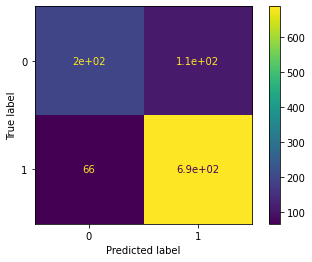

In [59]:
print("Confusion Matrix \n")
plot_confusion_matrix(LR_model,X_train,Y_train);

## Training Probabilities

In [60]:
y_train_prob=LR_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.933264,0.066736
1,0.095272,0.904728
2,0.293630,0.706370
3,0.112030,0.887970
4,0.016233,0.983767


# AUC ROC curve for Logistic Regression Train

The AUC score is: 0.890


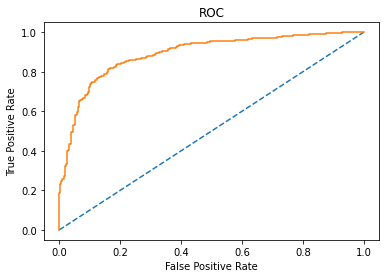

In [61]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

# Test Metrics

In [62]:
y_test_predict=LR_model.predict(X_test)
LR_test_score=LR_model.score(X_test,Y_test)
print("Accuracy Score : ",LR_test_score)

Accuracy Score :  0.8289473684210527


In [63]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Confusion Matrix 



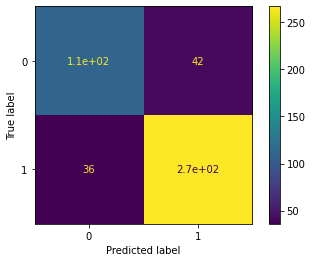

In [64]:
print("Confusion Matrix \n")
plot_confusion_matrix(LR_model,X_test,Y_test);

## Testing Probabilities

In [65]:
y_test_prob=LR_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


# AUC ROC curve for Logistic Regression Test

The AUC score is: 0.883


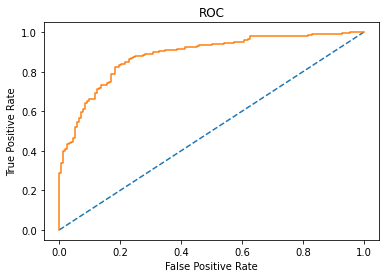

In [66]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(Y_test, probs)
print('The AUC score is: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [67]:
lr_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df1.loc["1"][2],2)
lr_train_recall=round(df1.loc["1"][1],2)
lr_train_precision=round(df1.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.86
lr_train_recall  0.91
lr_train_f1  0.89


In [68]:
lr_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df1.loc["1"][2],2)
lr_test_recall=round(df1.loc["1"][1],2)
lr_test_precision=round(df1.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.86
lr_test_recall  0.88
lr_test_f1  0.87


# Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [70]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Train Metrics

In [71]:
Y_train_predict=NB_model.predict(X_train)
nb_train_score=NB_model.score(X_train, Y_train)
print("Accuracy Score: ",nb_train_score)



Accuracy Score:  0.8341187558906692


In [72]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, Y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 



Confusion Matrix 



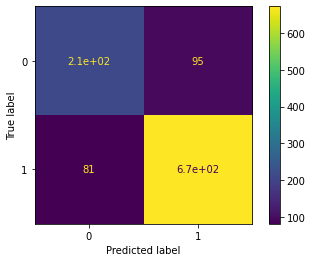

In [73]:
print("Confusion Matrix \n")
plot_confusion_matrix(NB_model,X_train,Y_train);

# AUC and ROC for the training data

The AUC score is: 0.889


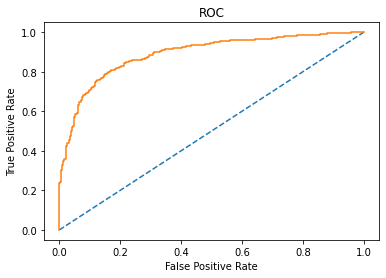

In [74]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % nb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

## Test Metrics

In [75]:
Y_test_predict=NB_model.predict(X_test)
nb_test_score=NB_model.score(X_test, Y_test)
print("Accuracy Score : ",nb_test_score)

Accuracy Score :  0.8223684210526315


In [76]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, Y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



Confusion Matrix 



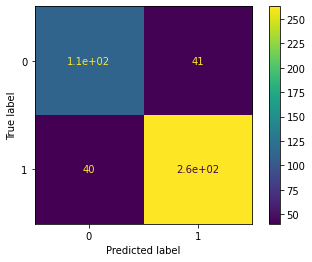

In [77]:
print("Confusion Matrix \n")
plot_confusion_matrix(NB_model,X_test,Y_test);

# AUC and ROC for the testing data

The AUC Score is: 0.876


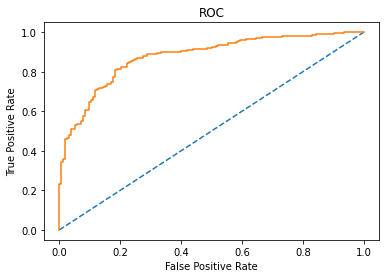

In [78]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(Y_test, probs)
print('The AUC Score is: %.3f' % nb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [79]:
nb_metrics=metrics.classification_report(Y_train, Y_train_predict,output_dict=True)
df1=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df1.loc["1"][2],2)
nb_train_recall=round(df1.loc["1"][1],2)
nb_train_precision=round(df1.loc["1"][0],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.88
nb_train_recall  0.89
nb_train_f1  0.88


In [80]:
nb_metrics=metrics.classification_report(Y_test, Y_test_predict,output_dict=True)
df1=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df1.loc["1"][2],2)
nb_test_recall=round(df1.loc["1"][1],2)
nb_test_precision=round(df1.loc["1"][0],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.87
nb_test_recall  0.87
nb_test_f1  0.87


# KNN

In [81]:
x=dfd

In [82]:
x=x.drop("IsLabour",axis=1)
y=dfd["IsLabour"]

In [83]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [84]:
from scipy.stats import zscore

In [85]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale']].apply(zscore)


In [86]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=1)

In [88]:

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
y_train_predict=KNN_model.predict(x_train)
KNN_train_score=KNN_model.score(x_train,y_train)

## Train Metrics

In [90]:
print("Accuracy Score: ",KNN_train_score)

Accuracy Score:  0.8567389255419415


In [91]:
print("Classification Report \n")
print(metrics.classification_report(y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061
 



Confusion Matrix 



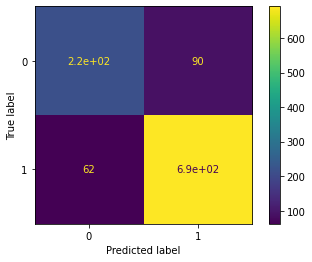

In [92]:
print("Confusion Matrix \n")
plot_confusion_matrix(KNN_model,x_train,y_train);

# AUC ROC Curve KNN Train

The AUC score is: 0.929


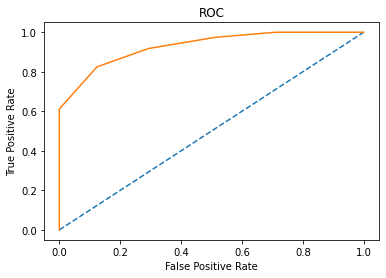

In [93]:
# predict probabilities
probs = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('The AUC score is: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

## Test Metrics

In [94]:
y_test_predict=KNN_model.predict(x_test)

KNN_test_score=KNN_model.score(x_test, y_test)

print("Accuaracy Score: ",KNN_test_score)

Accuaracy Score:  0.8267543859649122


In [95]:
print("Classification Report \n")
print(metrics.classification_report(y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456
 



Confusion Matrix 



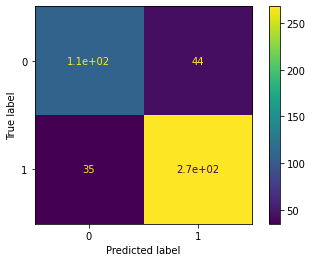

In [96]:
print("Confusion Matrix \n")
plot_confusion_matrix(KNN_model,x_test,y_test);

# AUC ROC Curve KNN Test

The AUC Score is: 0.870


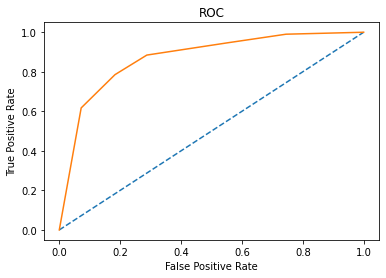

In [97]:
# predict probabilities
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('The AUC Score is: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

## Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

## Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [98]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.2149122807017544,
 0.19736842105263153,
 0.17324561403508776,
 0.1842105263157895,
 0.18201754385964908,
 0.17105263157894735,
 0.17763157894736847,
 0.16885964912280704,
 0.16666666666666663,
 0.17105263157894735]

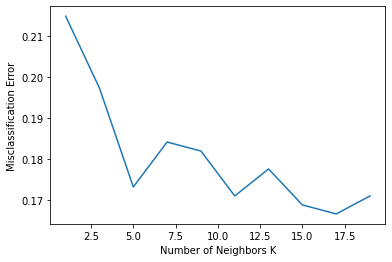

In [99]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# AUC ROC curve after n classifier for train data set

the auc curve 0.904 


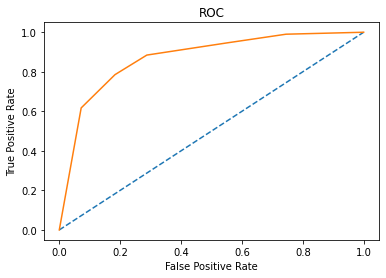

In [100]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
knn_train_auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % knn_train_auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

# AUC ROC curve after n classifier for test data set

the auc curve 0.889 


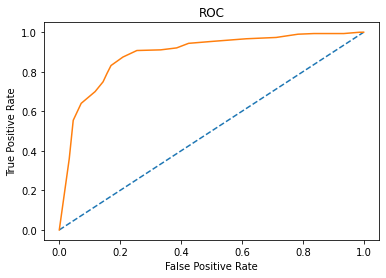

In [101]:

probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
knn_test_auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % knn_test_auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [102]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [103]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
KNN_train_score = KNN_model.score(x_train, y_train)
print(KNN_train_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8407163053722903
[[205 102]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [104]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
KNN_test_score = KNN_model.score(x_test, y_test)
print(KNN_test_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[102  51]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [105]:
knn_metrics=metrics.classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(df1.loc["1"][2],2)
knn_train_recall=round(df1.loc["1"][1],2)
knn_train_precision=round(df1.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.87
knn_train_recall  0.91
knn_train_f1  0.89


In [106]:
knn_metrics=metrics.classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(df1.loc["1"][2],2)
knn_test_recall=round(df1.loc["1"][1],2)
knn_test_precision=round(df1.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.84
knn_test_recall  0.92
knn_test_f1  0.88


# Model Tuning
list all the point and hyperparameters you changed for better prediction

# Logistic Regression
* Penalty: is used to specify the method of penalization of the coefficients of noncontributing variables.
* Lasso (L1) performs feature selection as it shrinks the less important feature’s coefficient to zero.
* Ridge (L2) all variables are included in model, though some are shrunk. Less computationally intensive than lasso.
Both penalty values restrict solver choices, as seen here.
* C: is the inverse of the regularization term (1/lambda). It tells the model how much large parameters are penalized, smaller values result in larger penalization; must be a positive float.
* Common values: [0.001,0.1 …10..100]
c* lass_weight: allows you to place greater emphasis on a class. For example, if the distribution between class 1 and class 2 is heavily imbalanced, the model can treat the two distributions appropriately.
* Default is that all weights = 1. Class weights can be specified in a dictionary.
* “Balanced” will create class weights that are inversely proportional to class frequencies, giving more weight to individual occurrences of smaller classes.

In [107]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

clf = LogisticRegression()
grid_values = {
               'penalty': ['l1', 'l2'],
                'C':[0.0001,0.001,.009,0.01,.09,1,5,10,25]
               }

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=10)
grid_clf_acc.fit(X_train, Y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))



Accuracy Score : 0.831140350877193
Precision Score : 0.8668831168831169
Recall Score : 0.8811881188118812
F1 Score : 0.8739770867430442


In [108]:
print("Best Parameters: ",grid_clf_acc.best_params_,'\n')
print("Best Estimator: ",grid_clf_acc.best_estimator_)

Best Parameters:  {'C': 1, 'penalty': 'l2'} 

Best Estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# KNN
* n_neighbors: determines the number of neighbors used when calculating the nearest-neighbors algorithm.
* Good range of values: [2,4,8,16]
* p: power metric when calculating the Minkowski metric, a fairly mathematically complex topic. When evaluating models, simply trying both 1 and two here is usually sufficient.
* Use value 1 to calculate Manhattan distance
* Use value 2 to calculate Euclidean distance (default)

In [109]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

knng = KNeighborsClassifier()

grid_values = {
                'n_neighbors': [1,3,5,7,9,10,11,13,15,17,19],
               #'p':[1,2]
               }
grid_clf_acc = GridSearchCV(knng, param_grid = grid_values,scoring = 'accuracy',cv=10)
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.8333333333333334
Precision Score : 0.8449848024316109
Recall Score : 0.9174917491749175
F1 Score : 0.8797468354430379


In [110]:
print("Best Parameters: ",grid_clf_acc.best_params_,'\n')
print("Best Estimator: ",grid_clf_acc.best_estimator_)

Best Parameters:  {'n_neighbors': 17} 

Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')


# Linear Discriminant Analysis

* Shrinkage: can be manually set to either 0 or 1.
* 	Value 0 corresponds to no shrinkage(which means the empirical covariance matrix will be used), and
* 	Value 1 corresponds to complete shrinkage(which means that the diagonal matrix of variances will be used as an estimate for the covariance matrix)
* 	For solver we have given three values “lsqr”, ”eigen”, “svd”.


In [111]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

ldag = LinearDiscriminantAnalysis()

grid_values = {
                'shrinkage':[0,1],
               'solver':['lsqr','eigen','svd'],
               }
grid_clf_acc = GridSearchCV(ldag, param_grid = grid_values,scoring = 'accuracy',cv=10)

grid_clf_acc.fit(X_train, Y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))

Accuracy Score : 0.831140350877193
Precision Score : 0.864516129032258
Recall Score : 0.8844884488448845
F1 Score : 0.8743882544861338


In [112]:
print("Best Parameters: ",grid_clf_acc.best_params_,'\n')
print("Best Estimator: ",grid_clf_acc.best_estimator_)

Best Parameters:  {'shrinkage': 0, 'solver': 'lsqr'} 

Best Estimator:  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
                           solver='lsqr', store_covariance=False, tol=0.0001)


In [113]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring="accuracy")
nbModel_grid.fit(X_train, Y_train)

#Predict values based on new parameters
y_pred_acc = nbModel_grid.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:    2.5s


Accuracy Score : 0.8245614035087719
Precision Score : 0.8631921824104235
Recall Score : 0.8745874587458746
F1 Score : 0.8688524590163936


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


In [115]:
print("Best Parameters: ",nbModel_grid.best_params_,'\n')
print("Best Estimator: ",nbModel_grid.best_estimator_)

Best Parameters:  {'var_smoothing': 0.0012328467394420659} 

Best Estimator:  GaussianNB(priors=None, var_smoothing=0.0012328467394420659)


# Bagging 

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    #'max_features': [500],
    'min_samples_leaf': [5],  #10,15
    'min_samples_split': [15],  #30,45
    'n_estimators': [100] #200,500
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, scoring = 'accuracy',cv = 10)

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [118]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
rf=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=grid_search, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=10, error_score=nan,
                                              estimator=RandomForestClassifier(bootstrap=True,
                                                                               ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='auto',
                                                                               max_leaf_nodes=None,
                                                                               max_samples=None,
                                                                               min_impurity_decrease=0.0,
                                                

In [120]:
grid_search.fit(X_train,Y_train)
print("Best Parameters: ",grid_search.best_params_)
best_grid_rfcl = grid_search.best_estimator_
print("Best Estimator: ",best_grid_rfcl)

Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Training Data

In [121]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_train_score=Bagging_model.score(X_train,Y_train)
print("Accuracy Score:: ",Bagging_train_score)

Accuracy Score::  0.8708765315739868


In [122]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.68      0.75       307
           1       0.88      0.95      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.81      0.83      1061
weighted avg       0.87      0.87      0.87      1061
 



Confusion Matrix 



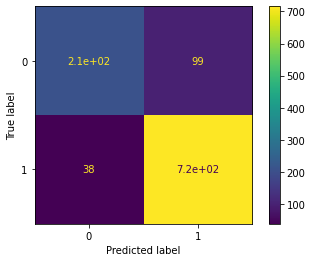

In [123]:
print("Confusion Matrix \n")
plot_confusion_matrix(Bagging_model,X_train,Y_train);

# AUC _ROC Curve Bagging Train

The AUC score is: 0.936


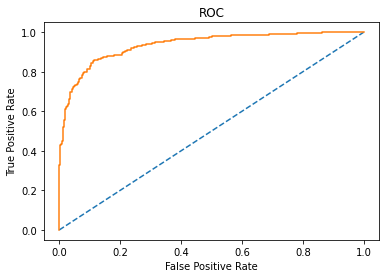

In [124]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % bg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

# Test Metrics

In [125]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_test_score=Bagging_model.score(X_test,Y_test)
print("Accuracy Score: ",Bagging_test_score)

Accuracy Score:  0.8289473684210527


In [126]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       153
           1       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.83      0.83      0.82       456
 



Confusion Matrix 



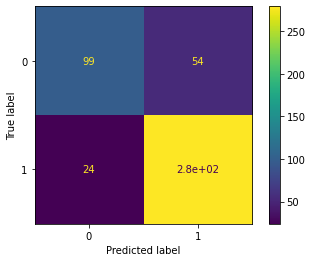

In [127]:
print("Confusion Matrix \n")
plot_confusion_matrix(Bagging_model,X_test,Y_test);

#AUC _ROC Curve Bagging Test

The AUC score is: 0.896


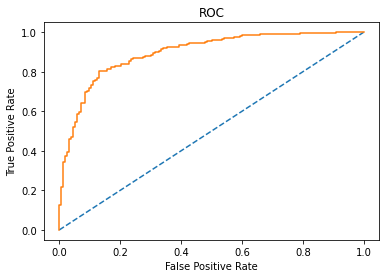

In [128]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_test_auc = roc_auc_score(Y_test, probs)
print('The AUC score is: %.3f' % bg_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

In [129]:
bg_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(bg_metrics).transpose()
bg_train_f1=round(df1.loc["1"][2],2)
bg_train_recall=round(df1.loc["1"][1],2)
bg_train_precision=round(df1.loc["1"][0],2)
print ('bg_train_precision ',bg_train_precision)
print ('bg_train_recall ',bg_train_recall)
print ('bg_train_f1 ',bg_train_f1)

bg_train_precision  0.88
bg_train_recall  0.95
bg_train_f1  0.91


In [130]:
bg_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(bg_metrics).transpose()
bg_test_f1=round(df1.loc["1"][2],2)
bg_test_recall=round(df1.loc["1"][1],2)
bg_test_precision=round(df1.loc["1"][0],2)
print ('bg_test_precision ',bg_test_precision)
print ('bg_test_recall ',bg_test_recall)
print ('bg_test_f1 ',bg_test_f1)

bg_test_precision  0.84
bg_test_recall  0.92
bg_test_f1  0.88


# Boosting 
# Ada Boost
# Train Metrics

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [133]:
y_train_predict=ADB_model.predict(X_train)
ADB_train_score=ADB_model.score(X_train,Y_train)
print("Accuracy Score: ",ADB_train_score)

Accuracy Score:  0.8501413760603205


In [134]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



Confusion Matrix 



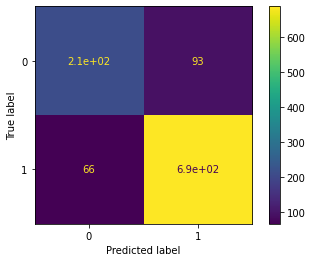

In [135]:
print("Confusion Matrix \n")
plot_confusion_matrix(ADB_model,X_train,Y_train);

# AUC _ROC Curve Boosting Train

The AUC score is: 0.915


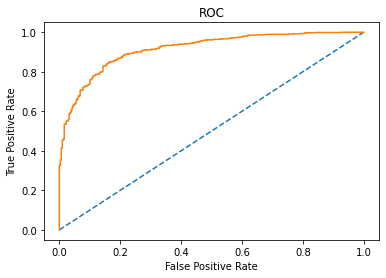

In [136]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

# Test Metrics

In [137]:
y_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, Y_test)
print("Accuracy Score: ",ADB_test_score)

Accuracy Score:  0.8135964912280702


In [138]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



Confusion Matrix 



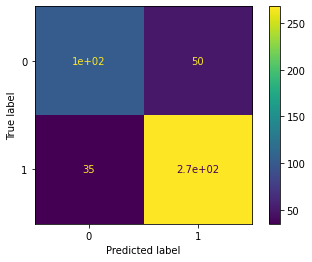

In [139]:
print("Confusion Matrix \n")
plot_confusion_matrix(ADB_model,X_test,Y_test);

# AUC _ROC Curve Boosting Test

The AUC score is: 0.877


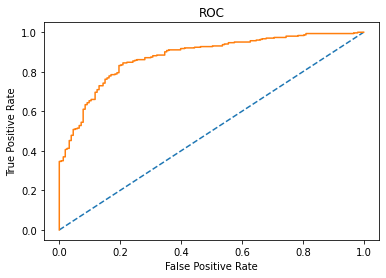

In [140]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(Y_test, probs)
print('The AUC score is: %.3f' % adb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [141]:
adb_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(adb_metrics).transpose()
adb_train_f1=round(df1.loc["1"][2],2)
adb_train_recall=round(df1.loc["1"][1],2)
adb_train_precision=round(df1.loc["1"][0],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.88
adb_train_recall  0.91
adb_train_f1  0.9


In [142]:
adb_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(adb_metrics).transpose()
adb_test_f1=round(df1.loc["1"][2],2)
adb_test_recall=round(df1.loc["1"][1],2)
adb_test_precision=round(df1.loc["1"][0],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.84
adb_test_recall  0.88
adb_test_f1  0.86


# Feature Importance

Feature: 0, Score: 0.59000
Feature: 1, Score: 0.03000
Feature: 2, Score: 0.05000
Feature: 3, Score: 0.07000
Feature: 4, Score: 0.07000
Feature: 5, Score: 0.17000
Feature: 6, Score: 0.02000
Feature: 7, Score: 0.00000


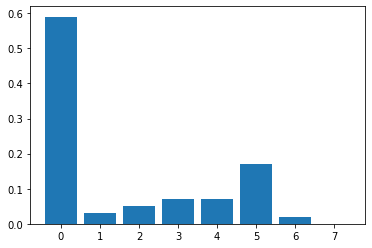

In [193]:
import matplotlib.pyplot as plt

# get importance
importance = ADB_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Gradient Boosting
## Train Metrics

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [144]:

y_train_predict = gbc_model.predict(X_train)
gbc_train_score = gbc_model.score(X_train, Y_train)
print("Accuracy Score: ",gbc_train_score)

Accuracy Score:  0.8925541941564562


In [145]:
print("Classification Report \n")
print(metrics.classification_report(Y_train, y_train_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 



Confusion Matrix 



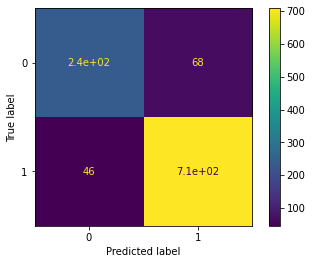

In [146]:
print("Confusion Matrix \n")
plot_confusion_matrix(gbc_model,X_train,Y_train);

# AUC _ROC Curve Boosting Train

The AUC score is: 0.951


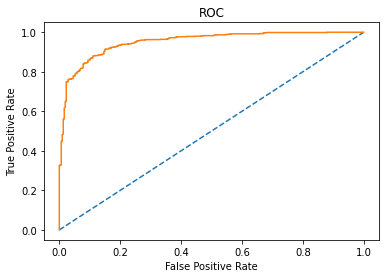

In [147]:
# predict probabilities
probs = gbc_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_train_auc = roc_auc_score(Y_train, probs)
print('The AUC score is: %.3f' % gbc_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(train_fpr, train_tpr);

## Test Metrics

In [148]:
y_test_predict = gbc_model.predict(X_test)
gbc_test_score = gbc_model.score(X_test, Y_test)
print("Accuracy Score: ",gbc_test_score)

Accuracy Score:  0.8355263157894737


In [149]:
print("Classification Report \n")
print(metrics.classification_report(Y_test, y_test_predict),'\n');

Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



Confusion Matrix 



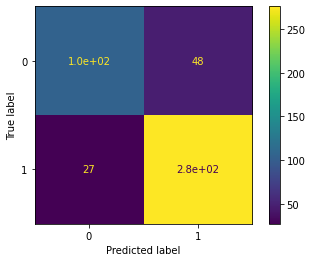

In [150]:
print("Confusion Matrix \n")
plot_confusion_matrix(gbc_model,X_test,Y_test);

# Gradient Boosting AUC_ROC Curve Test

The AUC score is: 0.899


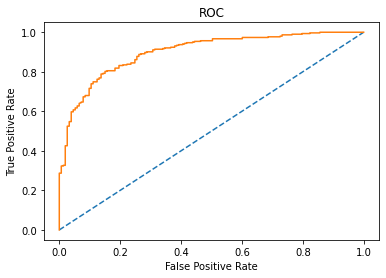

In [151]:
# predict probabilities
probs = gbc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbc_test_auc = roc_auc_score(Y_test, probs)
print('The AUC score is: %.3f' % gbc_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(test_fpr, test_tpr);

In [152]:
gbc_metrics=metrics.classification_report(Y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(gbc_metrics).transpose()
gbc_train_f1=round(df1.loc["1"][2],2)
gbc_train_recall=round(df1.loc["1"][1],2)
gbc_train_precision=round(df1.loc["1"][0],2)
print ('gbc_train_precision ',gbc_train_precision)
print ('gbc_train_recall ',gbc_train_recall)
print ('gbc_train_f1 ',gbc_train_f1)

gbc_train_precision  0.91
gbc_train_recall  0.94
gbc_train_f1  0.93


In [153]:
gbc_metrics=metrics.classification_report(Y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(gbc_metrics).transpose()
gbc_test_f1=round(df1.loc["1"][2],2)
gbc_test_recall=round(df1.loc["1"][1],2)
gbc_test_precision=round(df1.loc["1"][0],2)
print ('gbc_test_precision ',gbc_test_precision)
print ('gbc_test_recall ',gbc_test_recall)
print ('gbc_test_f1 ',gbc_test_f1)

gbc_test_precision  0.85
gbc_test_recall  0.91
gbc_test_f1  0.88


# Feature Importance

Feature: 0, Score: 0.09723
Feature: 1, Score: 0.07662
Feature: 2, Score: 0.03088
Feature: 3, Score: 0.18706
Feature: 4, Score: 0.34433
Feature: 5, Score: 0.17457
Feature: 6, Score: 0.08683
Feature: 7, Score: 0.00248


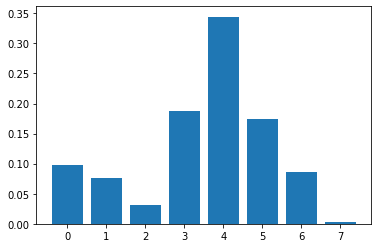

In [195]:
import matplotlib.pyplot as plt

# get importance
importance = gbc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Combined Metrics of All Models

In [154]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_score,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[LR_test_score,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[LDA_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[LDA_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'NB Train':[nb_train_score,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_score,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'KNN Train':[KNN_train_score,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[KNN_test_score,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Bagging Train':[Bagging_train_score,bg_train_auc,bg_train_recall,bg_train_precision,bg_train_f1],
        'Bagging Test':[Bagging_test_score,bg_test_auc,bg_test_recall,bg_test_precision,bg_test_f1],
        'Adaptive Boosting Train':[ADB_train_score,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Adaptive Boosting Test':[ADB_test_score,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'Gradient Boosting Train':[gbc_train_score,gbc_train_auc,gbc_train_recall,gbc_train_precision,gbc_train_f1],
        'Gradient Boosting Test':[gbc_test_score,gbc_test_auc,gbc_test_recall,gbc_test_precision,gbc_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,NB Train,NB Test,KNN Train,KNN Test,Bagging Train,Bagging Test,Adaptive Boosting Train,Adaptive Boosting Test,Gradient Boosting Train,Gradient Boosting Test
Accuracy,0.83,0.83,0.83,0.83,0.83,0.82,0.84,0.83,0.87,0.83,0.85,0.81,0.89,0.84
AUC,0.89,0.88,0.89,0.89,0.89,0.88,0.90,0.89,0.94,0.90,0.91,0.88,0.95,0.90
Recall,0.91,0.88,0.91,0.88,0.89,0.87,0.91,0.92,0.95,0.92,0.91,0.88,0.94,0.91
Precision,0.86,0.86,0.86,0.86,0.88,0.87,0.87,0.84,0.88,0.84,0.88,0.84,0.91,0.85
F1 Score,0.89,0.87,0.89,0.87,0.88,0.87,0.89,0.88,0.91,0.88,0.90,0.86,0.93,0.88


# Problem 2:

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

## President Franklin D. Roosevelt in 1941
## President John F. Kennedy in 1961
## President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [155]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural,stopwords
inaugural.fileids()
import string

roose=inaugural.raw('1941-Roosevelt.txt')
kenny=inaugural.raw('1961-Kennedy.txt')
nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [156]:
roose

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [157]:
kenny

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [158]:
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [159]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [160]:
col=["Roosevelt","Kennedy","Nixon"]
ls=[roose,kenny,nixon]

In [161]:
{"Roosevelt":roose,"Kennedy":kenny,"Nixon":nixon}

{'Kennedy': 'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to

In [162]:
df=pd.DataFrame({"Text":ls},index=col)


In [163]:
df

,Text
Roosevelt,On each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [164]:
df['word_count'] = df['Text'].apply(lambda x: len([x for x in x.split()]))
df[['Text','word_count']].head()

,Text,word_count
Roosevelt,On each national day of inauguration since 178...,1360
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [165]:
df['char_count'] = df['Text'].str.len() ## this also includes spaces
df[['Text','char_count']].head()

,Text,char_count
Roosevelt,On each national day of inauguration since 178...,7571
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [166]:
df['processed_text'] = df['Text'].str.replace(' ','')

In [167]:
df['char_count_nospace'] = df['processed_text'].str.len() ## this excludes spaces
df[['Text','char_count_nospace']].head()

,Text,char_count_nospace
Roosevelt,On each national day of inauguration since 178...,6249
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",6255
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",8223


In [168]:
import re

In [169]:
df['sent_count'] = df['Text'].apply(lambda x: len([x for x in re.split(r'[.!?]+',x)]))
df[['Text','sent_count']].head()

,Text,sent_count
Roosevelt,On each national day of inauguration since 178...,69
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",73


In [170]:
df[['Text','word_count','char_count','char_count_nospace','sent_count']].head()

,Text,word_count,char_count,char_count_nospace,sent_count
Roosevelt,On each national day of inauguration since 178...,1360,7571,6249,69
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,7618,6255,56
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,9991,8223,73


# 2.2 Remove all the stopwords from all three speeches.

## Converting to lower case

In [171]:
df['Tweet'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Tweet'].head()

Roosevelt    on each national day of inauguration since 178...
Kennedy      vice president johnson, mr. speaker, mr. chief...
Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Tweet, dtype: object

## Punctuation Removal

In [172]:
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','') 
#Replace any character that is not a word character or a space character with nothing.
df['Tweet'].head() #[^a-zA-Z\s]

Roosevelt    on each national day of inauguration since 178...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Tweet, dtype: object

## Total Stopwords Present

In [173]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','stopwords']].head()

,Text,stopwords
Roosevelt,On each national day of inauguration since 178...,711
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",672
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",969


## Removing Stopwords

In [174]:
df['word_count_tweet'] = df['Tweet'].apply(lambda x: len([x for x in x.split()]))
df[['Tweet','word_count_tweet']].head()

,Tweet,word_count_tweet
Roosevelt,on each national day of inauguration since 178...,1338
Kennedy,vice president johnson mr speaker mr chief jus...,1365
Nixon,mr vice president mr speaker mr chief justice ...,1802


In [175]:
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tweet'].head()

Roosevelt    national day inauguration since 1789 people re...
Kennedy      vice president johnson mr speaker mr chief jus...
Nixon        mr vice president mr speaker mr chief justice ...
Name: Tweet, dtype: object

In [176]:
df['word_count_nostop'] = df['Tweet'].apply(lambda x: len([x for x in x.split()]))
df[["Tweet",'word_count',"word_count_tweet","stopwords",'word_count_nostop']].head()

,Tweet,word_count,word_count_tweet,stopwords,word_count_nostop
Roosevelt,national day inauguration since 1789 people re...,1360,1338,711,627
Kennedy,vice president johnson mr speaker mr chief jus...,1390,1365,672,693
Nixon,mr vice president mr speaker mr chief justice ...,1819,1802,969,833


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [177]:
a=df.loc["Roosevelt","Tweet"]

In [178]:
freq1 = pd.Series(a.split()).value_counts()[:30]
freq1.head(10)

nation       11
know         10
spirit        9
democracy     9
life          8
us            8
people        7
america       7
freedom       6
years         6
dtype: int64

In [179]:
b=df.loc["Kennedy","Tweet"]

In [180]:
freq2 = pd.Series(b.split()).value_counts()[:30]
freq2.head(10)

let         16
us          12
world        8
sides        8
pledge       7
new          7
free         5
citizens     5
shall        5
power        5
dtype: int64

In [181]:
c=df.loc["Nixon","Tweet"]

In [182]:
freq3 = pd.Series(c.split()).value_counts()[:30]
freq3.head(10)

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
dtype: int64

In [183]:
freq = pd.Series(' '.join(df['Tweet']).split()).value_counts()[:30]
freq.head(10)

us         46
let        39
world      27
new        26
peace      23
america    22
nation     21
nations    15
freedom    14
people     14
dtype: int64

since "--" is a garbage value therefore we will remove it and find the most commonly occuring top 3 words in the President address

Therfore, the top 3 most occuring words in the inaugura address are:<br>
1) us<br>
2) let<br>
3) world

# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)


In [184]:
from wordcloud import WordCloud

# President Franklin D. Roosevelt in 1941

In [185]:
wordcloud1 = WordCloud(
                      width=3000,
                      height=2500
                     ).generate(a)

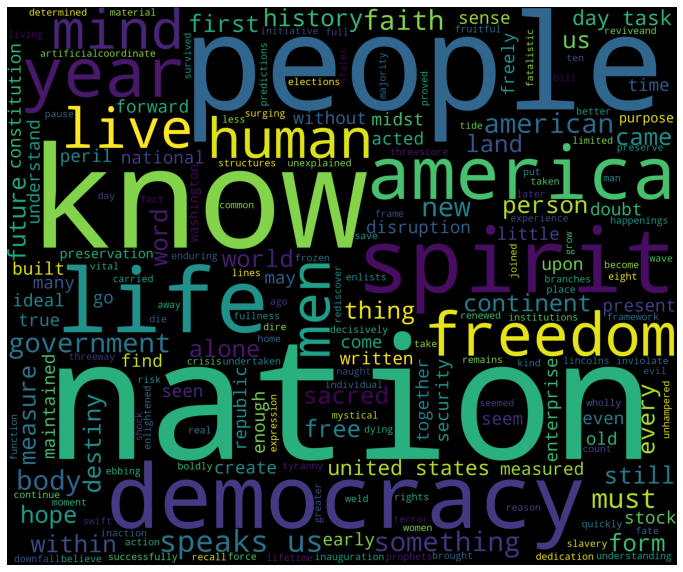

In [186]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

# President John F. Kennedy in 1961

In [187]:
wordcloud2 = WordCloud(width=3000,
                      height=2500
                     ).generate(b)

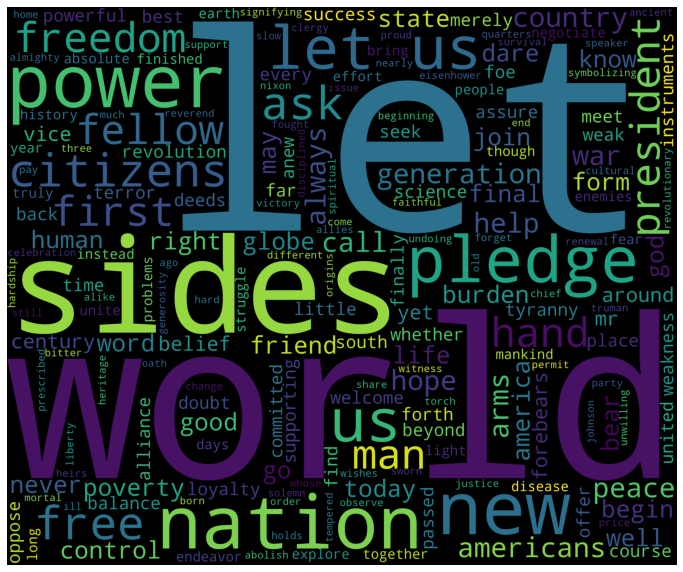

In [188]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# President Richard Nixon in 1973

In [189]:
wordcloud3 = WordCloud(width=3000,
                      height=2500
                     ).generate(c)

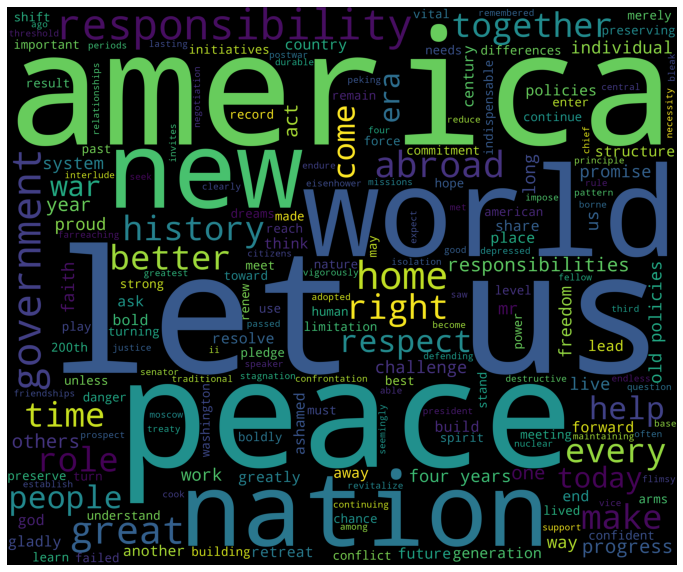

In [190]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()